# K Means Clustering
## Ifeoluwa Babatunde
## Shaquitha Maruni
### Dataset: DS4C: Data Science for COVID-19 in South Korea


The theme of this project revolves around the set of data provided by South Korea tracking their infected patients.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
# Get patient info
patient = pd.read_csv('PatientInfo.csv')

In [4]:
# A look at what the data looks like
patient.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [5]:
# How is the data structured
patient.describe()

,patient_id,global_num,birth_year,infection_order,infected_by,contact_number
count,3.326000e+03,2237.000000,2889.000000,31.000000,8.060000e+02,614.000000
mean,3.514908e+09,6669.169423,1974.956732,2.387097,2.671714e+09,18.710098
std,2.209142e+09,3321.396732,20.275471,1.453213,1.740450e+09,75.352899
min,1.000000e+09,1.000000,1916.000000,1.000000,1.000000e+09,0.000000
25%,1.300000e+09,4172.000000,1961.000000,1.000000,1.200000e+09,2.000000
50%,2.000001e+09,7855.000000,1975.000000,2.000000,2.000000e+09,4.000000
75%,6.001001e+09,9433.000000,1993.000000,3.000000,4.100000e+09,14.000000
max,7.000000e+09,10660.000000,2020.000000,6.000000,7.000000e+09,1160.000000


In [6]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 18 columns):
patient_id            3326 non-null int64
global_num            2237 non-null float64
sex                   3260 non-null object
birth_year            2889 non-null float64
age                   3252 non-null object
country               3326 non-null object
province              3326 non-null object
city                  3247 non-null object
disease               18 non-null object
infection_case        2559 non-null object
infection_order       31 non-null float64
infected_by           806 non-null float64
contact_number        614 non-null float64
symptom_onset_date    471 non-null object
confirmed_date        3323 non-null object
released_date         1218 non-null object
deceased_date         60 non-null object
state                 3326 non-null object
dtypes: float64(5), int64(1), object(12)
memory usage: 467.8+ KB


# Exploratory Data Analysis
## Use seaborn to create a simple heatmap to SHOW missing data.
Missing data can be a limitation in implementing our algorithms

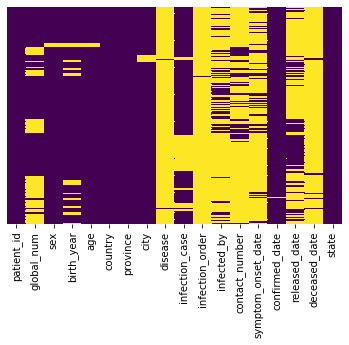

In [7]:
sns.heatmap(patient.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Our columns of interest are: sex, birth_year, age, disease and deceased state.


The heatmap above shows our disease and deceased state column requires some data cleaning.

# Visualizing the Data

## Total Confirmed Cases by Gender
Here we will get the counts of each gender group in order to create a pie chart.

In [8]:
patient['sex'].value_counts()

female    1831
male      1429
Name: sex, dtype: int64

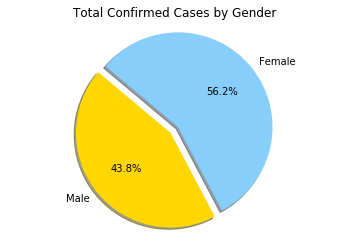

In [9]:
# Data to plot
labels = 'Male', 'Female'
sizes = [1429, 1831]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Total Confirmed Cases by Gender')
plt.show()

In [10]:
# Remove rows without a deceased date. This implies they are not deceased.

df1 = patient[patient.deceased_date.notnull()]

## Total Deceased Cases by Gender
Here we will get the counts of each gender group of the deceased in order to create a pie chart.

In [11]:
df1['sex'].value_counts()

male      39
female    21
Name: sex, dtype: int64

In [12]:
# Data to plot
labels = 'Male', 'Female'
sizes = [39, 21]
colors = ['gold', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

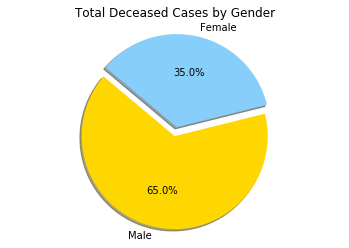

In [13]:
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Total Deceased Cases by Gender')
plt.show()

## Total Deceased by Age Range
Here we will get the counts of each age group of the deceased in order to create a bar chart graph. 

In [14]:
# get counts
df1['age'].value_counts()

80s    19
70s    16
60s    11
50s     7
90s     6
30s     1
Name: age, dtype: int64

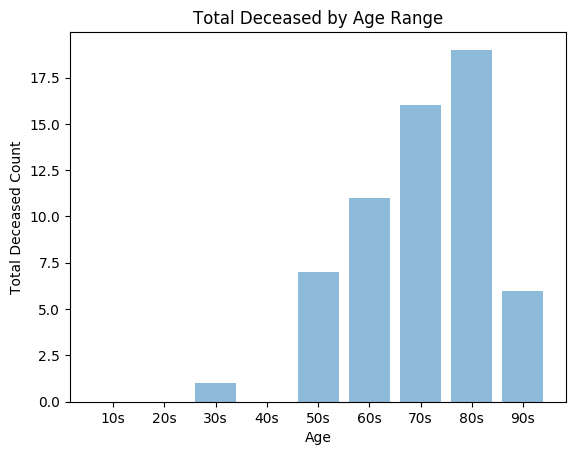

In [15]:
# plot the graph!
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('10s','20s','30s','40s','50s','60s','70s','80s','90s')
y_pos = np.arange(len(objects))
performance = [0,0,1,0,7,11,16,19,6]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Total Deceased Count')
plt.xlabel('Age')
plt.title('Total Deceased by Age Range')

plt.show()

## Patients with Underlying Disease
Now, we will take a look and see if having an underlying disease is related to those that are deceased.

In [16]:
#get counts of disease column. true means they have one, false means they don't 

patient['disease'].value_counts()

True    18
Name: disease, dtype: int64

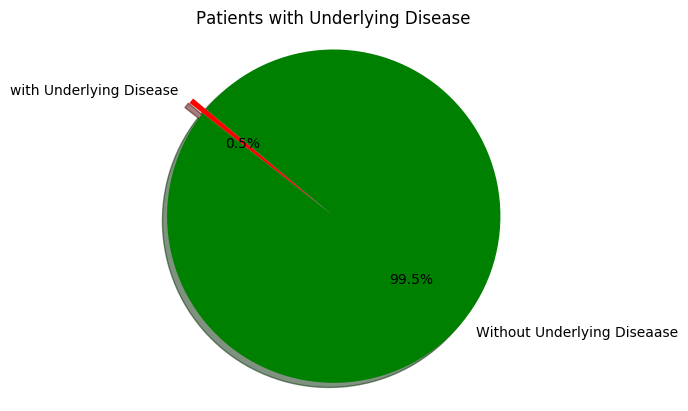

In [17]:
# Data to plot
labels = 'with Underlying Disease', 'Without Underlying Diseaase'
sizes = [18, 3308]
colors = ['red', 'green']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Patients with Underlying Disease')
plt.show()

If we take a look at just the counts of those with an underlying disease that are also deceased, every patient with an underlying disease did not survive.

In [18]:
df1['disease'].value_counts()

True    18
Name: disease, dtype: int64

## Data Cleaning


### Columns to isolate for this analysis

Sex - Sex of the patient

Age - Age of patient

Disease - Does the patient have an underlying condition

Deceased - Deceased date


In [19]:
# Convert Date strings into actual dates
patient['confirmed_date'] = pd.to_datetime(patient['confirmed_date'])
patient['deceased_date'] = pd.to_datetime(patient['deceased_date'])

# Calculate difference between confirm date and decease
patient['daysToDecease'] = (patient['deceased_date'] - patient['confirmed_date'])/np.timedelta64(1,'D')

# Fill blanks with 0
patient['daysToDecease'] = patient['daysToDecease'].fillna(0)


# Find deceased vs released
patient['deceased'] = patient['daysToDecease'].apply(lambda x: x > 0)

# released_date and deceased_date now datetime
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 20 columns):
patient_id            3326 non-null int64
global_num            2237 non-null float64
sex                   3260 non-null object
birth_year            2889 non-null float64
age                   3252 non-null object
country               3326 non-null object
province              3326 non-null object
city                  3247 non-null object
disease               18 non-null object
infection_case        2559 non-null object
infection_order       31 non-null float64
infected_by           806 non-null float64
contact_number        614 non-null float64
symptom_onset_date    471 non-null object
confirmed_date        3323 non-null datetime64[ns]
released_date         1218 non-null object
deceased_date         60 non-null datetime64[ns]
state                 3326 non-null object
daysToDecease         3326 non-null float64
deceased              3326 non-null bool
dtypes: bool(1), dateti

In [20]:
patient.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,daysToDecease,deceased
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaT,released,0.0,False
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaT,released,0.0,False
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaT,released,0.0,False
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaT,released,0.0,False
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaT,released,0.0,False


In [21]:
# Cleanup disease and age so that age is not a range but an actual number
patient['age'] = 2020 - patient['birth_year']
patient['age'].fillna(patient['age'].mean(), inplace=True)

patient['disease'].fillna(False, inplace=True)

In [22]:
# What are the columns I will be focusing on for final data set?
cols = ['sex', 'age', 'disease', 'deceased' ]

In [23]:
covid = patient[cols]

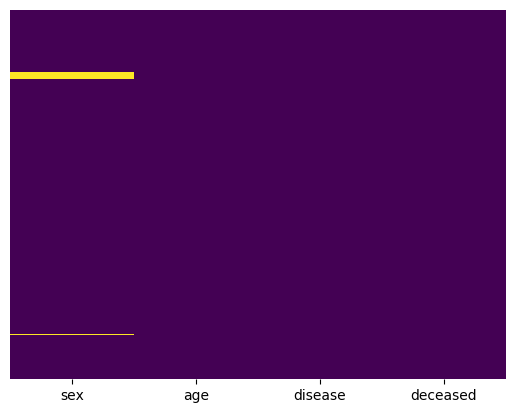

In [24]:
#a new heatmap to verify we are not missing data before using classification algorithm
sns.heatmap(covid.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
covid.dropna()
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 4 columns):
sex         3260 non-null object
age         3326 non-null float64
disease     3326 non-null bool
deceased    3326 non-null bool
dtypes: bool(2), float64(1), object(1)
memory usage: 58.6+ KB


In [26]:
#Use the pandas package to convert categorical features to dummy variables to get a cleaned dataframe
covid = pd.get_dummies(covid, prefix_sep='_', drop_first=True)

In [27]:
# Update boolean values to either 0 or 1
covid['disease'] = covid['disease'] * 1
covid['deceased'] = covid['deceased'] * 1

In [28]:
covid.head()

,age,disease,deceased,sex_male
0,56.0,0,0,1
1,33.0,0,0,1
2,56.0,0,0,1
3,29.0,0,0,1
4,28.0,0,0,0


In [29]:
print( 'Number deceased: ' + str(covid[covid['deceased'] > 0]['age'].count()) )
print( 'Number survived: ' + str(covid[covid['deceased'] == 0]['age'].count()) )

Number deceased: 53
Number survived: 3273


In [30]:
# Numbers are heavily skewed so adjust to have a 1:2 ratio, take only 150 from the total survived
c1 = covid[covid['deceased'] == 0].head(n=150)
c1 = pd.concat([c1, covid[covid['deceased'] > 0]])
c1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 3093
Data columns (total 4 columns):
age         203 non-null float64
disease     203 non-null int64
deceased    203 non-null int64
sex_male    203 non-null uint8
dtypes: float64(1), int64(2), uint8(1)
memory usage: 6.5 KB


In [31]:
# Get our independent variables - sex, age, disease
X = np.array(c1.drop(['deceased'], 1).astype(float))

# Get the dependent variable or value we are trying to predict - deceased
y = np.array(c1['deceased'])

Splitting the dataset into the Training set and Test set

Data split into 20% toward Test data with the other 80% being used to train the model

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [33]:
X_train[:5]

array([[65.,  0.,  1.],
       [58.,  0.,  1.],
       [52.,  0.,  1.],
       [51.,  0.,  0.],
       [91.,  0.,  0.]])

In [34]:
y_train[:5]

array([0, 0, 0, 0, 1])

## Building a classification model using logistic regression

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. In this case we are assigning the observation of age, sex and pre-existing conditions to determine whether a patient dies or not which is a binary result. 

In [35]:
# Import the Logistic regression model
from sklearn.linear_model import LogisticRegression

# Build a LogisticRegression classifier and train it using the provided traing data created above
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

/Users/smaruni/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
# Using the test set computed score the model we built

print('Score for logistic regression: ' + str(classifier.score(X_test, y_test)))

Score for logistic regression: 0.9024390243902439


Explanation of above score

The computed score of 0.90 let's us know that for the given test set we were accurate about 90% of the time. 

## Sample Predictions

Build predictions based on trends by age, pre-existing condition and gender

In [37]:
# Predicting a few random values

print( '61 years old | pre-existing conditions    | Male   >>> ' + str(classifier.predict([[61.000000, 1, 1]])) )
print( '80 years old | pre-existing conditions    | Female >>> ' + str(classifier.predict([[80.000000, 1, 0]])) )
print( '20 years old | No pre-existing conditions | Male   >>> ' + str(classifier.predict([[20.000000, 0, 1]])) )
print( '40 years old | No pre-existing conditions | Female >>> ' + str(classifier.predict([[80.000000, 1, 0]])) )
print( '30 years old | pre-existing conditions    | Female >>> ' + str(classifier.predict([[30.000000, 1, 0]])) )

61 years old | pre-existing conditions    | Male   >>> [1]
80 years old | pre-existing conditions    | Female >>> [1]
20 years old | No pre-existing conditions | Male   >>> [0]
40 years old | No pre-existing conditions | Female >>> [1]
30 years old | pre-existing conditions    | Female >>> [0]


Let's look at patient's that are 20 -> 

In [38]:
print( '20 years old | No pre-existing conditions | Female >>> ' + str(classifier.predict([[20.000000, 0, 0]])) )
print( '20 years old | No pre-existing conditions | Male >>> ' + str(classifier.predict([[20.000000, 0, 1]])) )

print( '20 years old | pre-existing conditions | Female >>> ' + str(classifier.predict([[20.000000, 0, 0]])) )
print( '20 years old | pre-existing conditions | Male >>> ' + str(classifier.predict([[20.000000, 0, 1]])) )

20 years old | No pre-existing conditions | Female >>> [0]
20 years old | No pre-existing conditions | Male >>> [0]
20 years old | pre-existing conditions | Female >>> [0]
20 years old | pre-existing conditions | Male >>> [0]


Younger individuals have a better chance of survival with or without preexisting conditions.

Let's look at patient's that are 35 -> 

In [39]:
print( '35 years old | No pre-existing conditions | Female >>> ' + str(classifier.predict([[35.000000, 0, 0]])) )
print( '35 years old | No pre-existing conditions | Male   >>> ' + str(classifier.predict([[35.000000, 0, 1]])) )

print( '35 years old | Pre-existing conditions    | Female >>> ' + str(classifier.predict([[35.000000, 1, 0]])) )
print( '35 years old | Pre-existing conditions    | Male   >>> ' + str(classifier.predict([[35.000000, 1, 1]])) )

35 years old | No pre-existing conditions | Female >>> [0]
35 years old | No pre-existing conditions | Male   >>> [0]
35 years old | Pre-existing conditions    | Female >>> [0]
35 years old | Pre-existing conditions    | Male   >>> [0]


Middle aged individuals have a better chance of survival with or without preexisting conditions

Let's look at patient's that are 55 -> 

In [40]:
print( '55 years old | No pre-existing conditions | Female >>> ' + str(classifier.predict([[55.000000, 0, 0]])) )
print( '55 years old | No pre-existing conditions | Male   >>> ' + str(classifier.predict([[55.000000, 0, 1]])) )

print( '55 years old | Pre-existing conditions    | Female >>> ' + str(classifier.predict([[55.000000, 1, 0]])) )
print( '55 years old | Pre-existing conditions    | Male   >>> ' + str(classifier.predict([[55.000000, 1, 1]])) )

55 years old | No pre-existing conditions | Female >>> [0]
55 years old | No pre-existing conditions | Male   >>> [0]
55 years old | Pre-existing conditions    | Female >>> [1]
55 years old | Pre-existing conditions    | Male   >>> [1]


With senior individuals we see that pre-existing condition is a differentiating factor determing who survives.

Let's look at patient's that are 80 ->

In [41]:
print( '80 years old | No pre-existing conditions | Female >>> ' + str(classifier.predict([[80.000000, 0, 0]])) )
print( '80 years old | No pre-existing conditions | Male   >>> ' + str(classifier.predict([[80.000000, 0, 1]])) )

print( '80 years old | Pre-existing conditions    | Female >>> ' + str(classifier.predict([[80.000000, 1, 0]])) )
print( '80 years old | Pre-existing conditions    | Male   >>> ' + str(classifier.predict([[80.000000, 1, 1]])) )

80 years old | No pre-existing conditions | Female >>> [1]
80 years old | No pre-existing conditions | Male   >>> [1]
80 years old | Pre-existing conditions    | Female >>> [1]
80 years old | Pre-existing conditions    | Male   >>> [1]


With the elderly we see that age is mitigating factor regardless of gender and/or pre-existing conditions


## Quality Check- Confusion Matrix

Using a Confusion Matrix will allow for us to assess the performance of our logistic regression model.

In [42]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[29,  2],
       [ 2,  8]])

In [43]:
#downgrade the matplotlib version to package 3.1.0 to fix heatmap visualization
#pip install matplotlib==3.1.0

Text(0.5, 427.9555555555555, 'Predicted Label')

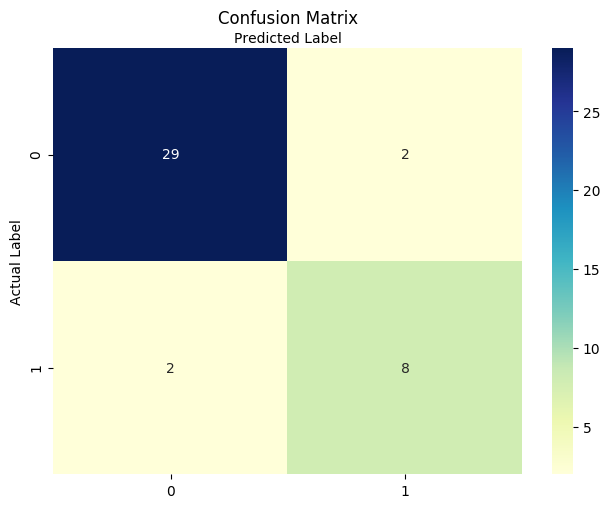

In [44]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Confusion Matrix Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


Depicted above are the values from our Confusion Matrix

29 are True Positives = truly survived

2 False Positives = reported survived but was actually deceased

2 False Negatives = reported deceased but actually survived

8 True Negatives = truly deceased

### An Evaluation of the Confusion Matrix

In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9024390243902439
Precision: 0.8
Recall: 0.8


Our model has a score of 90% as in we will predict correctly 90% of the time
 
The Precision score indicates we will predict True Positives correctly 80% of the time of all survival cases, only having 20% False Negatives.

Recall indicates there will be 80% True Positives out of all reported survival cases, but 20% will be False Positives

### Making Confirmed Cases Predictions

Here, the column "confirmed_date" will be converted into a numerical count that will then be an accumulation of numbers. The date columns will also be converted in order to do the predictions. 

In [46]:
daily_count = patient.groupby(patient.confirmed_date).patient_id.count()
accumulated_count = daily_count.cumsum()

In [47]:
date_cols = ["confirmed_date", "released_date", "deceased_date"]
for col in date_cols:
    patient[col] = pd.to_datetime(patient[col])

Now, let's visualize the confirmed number of cases.

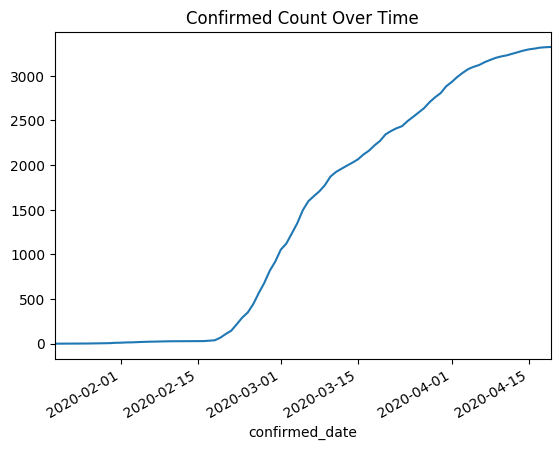

In [48]:
accumulated_count.plot()
plt.title('Confirmed Count Over Time');

Here we will fill in the missing dates with 0. Then, we will only use the most recent data (last 30 rows), and prepare the data for the regresser.

In [49]:
data = daily_count.resample('D').first().fillna(0).cumsum()
data = data[30:]
x = np.arange(len(data)).reshape(-1, 1)
y = data.values

MLP Regressor is a supervised learning algorithm that can learn a non-linear fucntion aproximator based off a set of features and a target value.

In [50]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=[12, 12, 10], max_iter=50000, alpha=0.0005, random_state=45)
_=model.fit(x, y)

In [51]:
test = np.arange(len(data)+7).reshape(-1, 1)
pred = model.predict(test)

In [52]:
prediction = pred.round().astype(int)
week = [data.index[0] + timedelta(days=i) for i in range(len(prediction))]
dt_idx = pd.DatetimeIndex(week)
predicted_count = pd.Series(prediction, dt_idx)

This is when we can visualize the prediction versus the actual count.

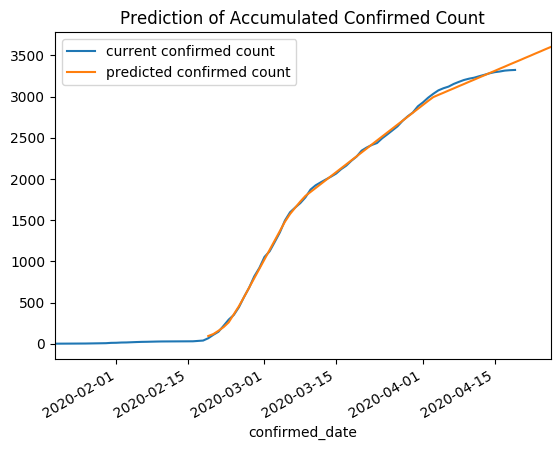

In [53]:
accumulated_count.plot()
predicted_count.plot()
plt.title('Prediction of Accumulated Confirmed Count')
plt.legend(['current confirmed count', 'predicted confirmed count'])
plt.show()

If we want to look at this data by the numbers, we can do the following code to see the last 7 points:

In [54]:
print(predicted_count[-7:])

2020-04-20    3443
2020-04-21    3470
2020-04-22    3496
2020-04-23    3523
2020-04-24    3549
2020-04-25    3576
2020-04-26    3602
dtype: int64
